In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('C:/Users/admin/Downloads/50_Startups.csv')

In [7]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#  EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
dff=df.rename({'R&D Spend':'RD','Administration':'ADS','Marketing Spend':'MKS'},axis=1)
dff.head()

,RD,ADS,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
dff[dff.duplicated()]

,RD,ADS,MKS,State,Profit


# Correlation Matrix

In [14]:
dff.corr()

,RD,ADS,MKS,Profit
RD,1.000000,0.241955,0.724248,0.972900
ADS,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatter plots between variables along with histogram

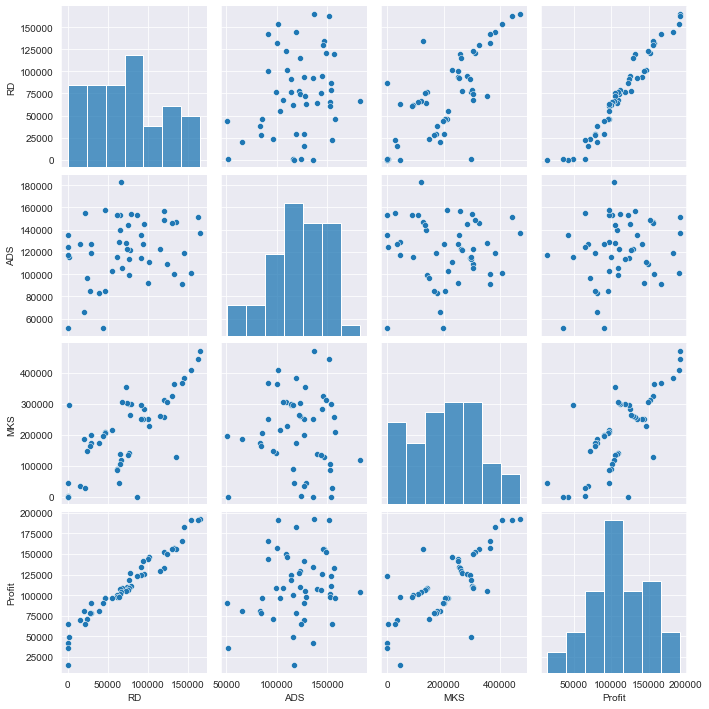

In [16]:
# Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(dff)

#  Preparing the model

In [20]:
# Building model
import statsmodels.formula.api as smf

In [22]:
model=smf.ols('Profit~RD+ADS+MKS',data=dff).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        12:22:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
ADS           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKS            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RD               0.805715
ADS             -0.026816
MKS              0.027228
dtype: float64

In [27]:
# p and t values
print(model.pvalues)
print(model.tvalues)

Intercept    1.057379e-09
RD           2.634968e-22
ADS          6.017551e-01
MKS          1.047168e-01
dtype: float64
Intercept     7.626218
RD           17.846374
ADS          -0.525507
MKS           1.655077
dtype: float64


In [28]:
# Rsquared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [ ]:
# As by seeing the model summary we can see that the probability value for  ADS and MKS are more than 0.05, so we have to go 
# through linear regression for both ADS and MKS for finding their t and p-values

### Simple linear regression model

In [33]:
m1_ADS=smf.ols('Profit~ADS',data=dff).fit()

# p & t values
print(m1_ADS.pvalues)   # p-value for ADS is in-significant
print(m1_ADS.tvalues)

Intercept    0.003824
ADS          0.162217
dtype: float64
Intercept    3.040044
ADS          1.419493
dtype: float64


In [39]:
m1_MKS=smf.ols('Profit~MKS',data=dff).fit()

# p & t values
print(m1_MKS.pvalues)   # p-value for MKS is significant
print(m1_MKS.tvalues)

Intercept    4.294735e-10
MKS          4.381073e-10
dtype: float64
Intercept    7.808356
MKS          7.802657
dtype: float64


In [41]:
m1_MKS_ADS=smf.ols('Profit~MKS+ADS',data=dff).fit()

# p & t values
print(m1_MKS_ADS.pvalues)
print(m1_MKS_ADS.tvalues)    # Combination of both ADS and MKS as significant p-values

Intercept    2.589341e-01
MKS          9.727245e-11
ADS          1.729198e-02
dtype: float64
Intercept    1.142741
MKS          8.281039
ADS          2.467779
dtype: float64


# Model Validation


### Two Techniques 
### 1. Collinearity check & 2. Residual Analysis

In [42]:
# Collinearity Check
# Calculating VIF

req_ads=smf.ols('ADS~RD+MKS',data=dff).fit().rsquared
vif_ads=1/(1-req_ads) 

req_mks=smf.ols('MKS~RD+ADS',data=dff).fit().rsquared
vif_mks=1/(1-req_mks) 

req_rd=smf.ols('RD~MKS+ADS',data=dff).fit().rsquared
vif_rd=1/(1-req_rd) 

#storing VIF values in one dataframe

di={'Variables':['ADS','MKS','RD'],'VIF_values':[vif_ads,vif_mks,vif_rd]}
vif_frame=pd.DataFrame(di)
vif_frame

,Variables,VIF_values
0,ADS,1.175091
1,MKS,2.326773
2,RD,2.468903


In [ ]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation.

### Residual Analysis

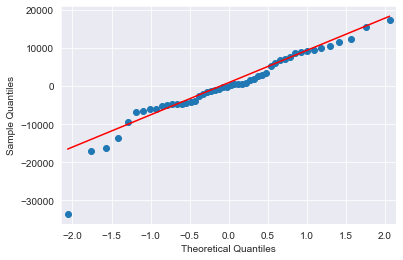

In [43]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')   ## line=45 degree to draw diagonal line
plt.title=('Normal Q-Q plot of Residuals')
plt.show()

In [45]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

#### Residual of Homoscedasticity

##### Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

In [46]:
import matplotlib.pyplot as plt

def get_standardised_values (vals):
    return (vals-vals.mean()/vals.std())

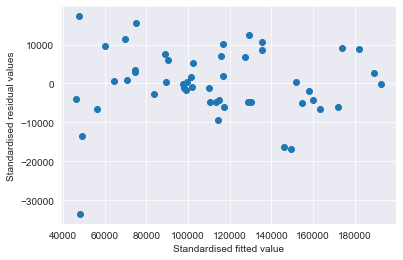

In [57]:
plt.scatter( get_standardised_values(model.fittedvalues),
             get_standardised_values(model.resid))
plt.title:('Residual plot')     
plt.xlabel('Standardised fitted value')
plt.ylabel('Standardised residual values')
plt.show() 

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

### Residual VS Regressor

eval_env: 1


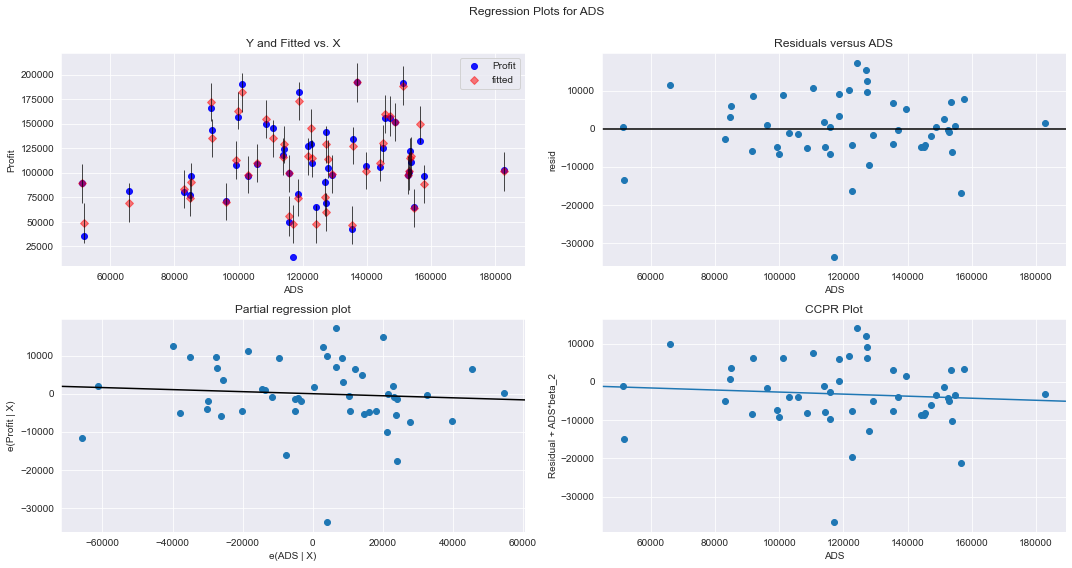

In [52]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'ADS',fig=fig)
plt.show()

eval_env: 1


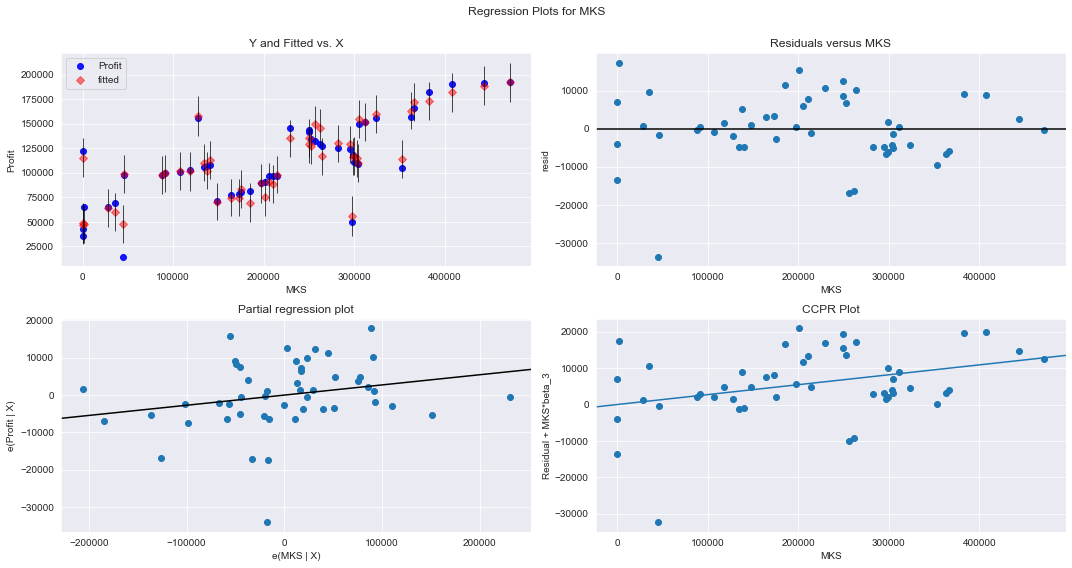

In [53]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'MKS',fig=fig)
plt.show()

eval_env: 1


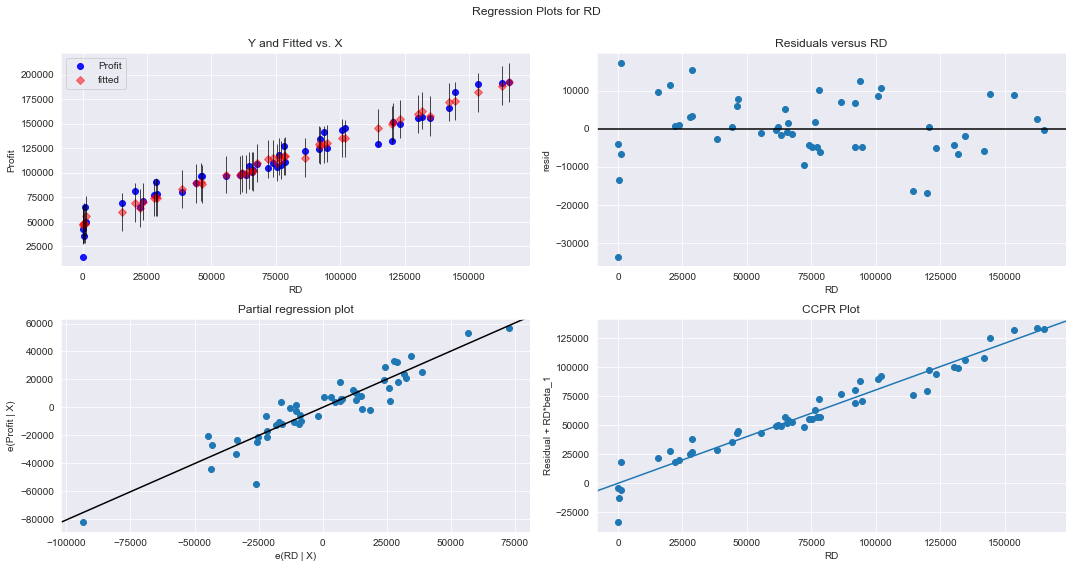

In [54]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

# Model Deletion Diagnostics (checking Outliers or Influencers)


### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [58]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [61]:
(c,_)

(array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
        1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
        4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
        1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
        8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
        4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
        5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
        1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
        7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
        5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
        1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
        1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
        1.90527441e-01, 2.88082293e-01]),
 array([1.        , 0.99997771, 0.99791128, 0.99904583, 0.9995713 ,
        0.99971836, 0.9999

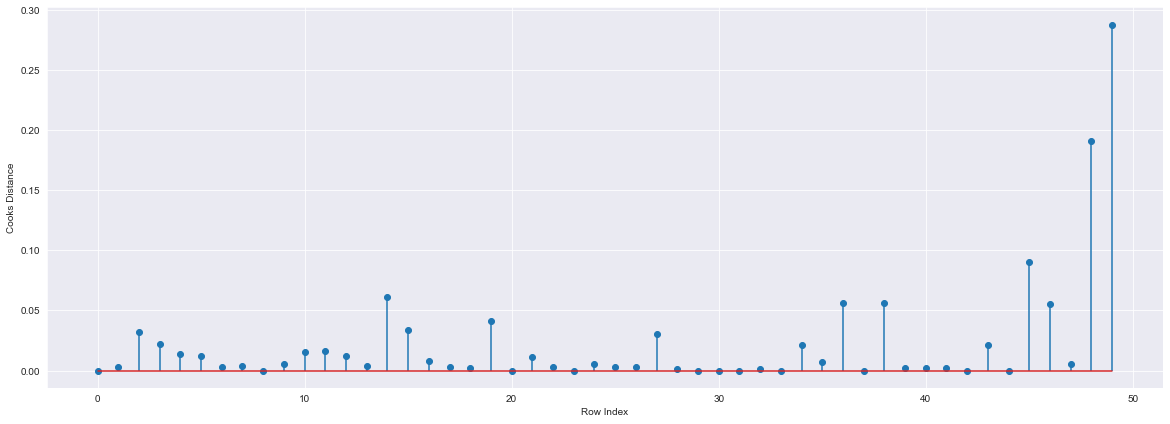

In [59]:
#Plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dff)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
#index and value of influencer where value of c is more than 0.5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# High Influence Point

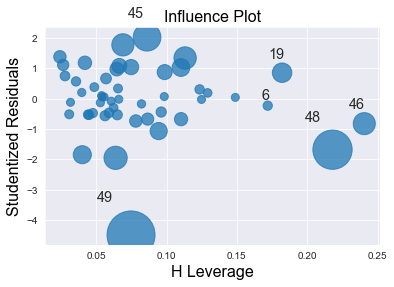

In [109]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [63]:
k=dff.shape[1]              # k is no. of columns in dataset
n=dff.shape[0]              # n is no. of datapoints in datasets
levergae_cutoff=3*((k+1)/n)

In [64]:
levergae_cutoff

0.36

### From the above plot, it is evident that data point 49 are highly influencer

In [65]:
dff[dff.index.isin([49])]

,RD,ADS,MKS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [66]:
dff.head()

,RD,ADS,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# see the difference in range in RD and in other variables
# so it is necessary to improve the model by dropping certain rows

# Improving the Model 

In [67]:
dff_new=pd.read_csv('C:/Users/admin/Downloads/50_Startups.csv')

In [77]:
#Discard the data points which are influencers and redesign the row number(reset_index()) 

dff_new1=dff.drop(dff.index[[49]],axis=0).reset_index()

In [78]:
dff_new1=dff_new1.drop('index',axis=1)

In [91]:
dff_new1

,RD,ADS,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [80]:
dff_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      49 non-null     float64
 1   ADS     49 non-null     float64
 2   MKS     49 non-null     float64
 3   State   49 non-null     object 
 4   Profit  49 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


## Building a model2

In [82]:
model2=smf.ols('Profit~RD+ADS+MKS',data=dff_new1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           8.85e-32
Time:                        13:24:42   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
ADS           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKS            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Again checking cook distance

In [83]:
model_influence_V=model2.get_influence()
(c_V,_)=model_influence_V.cooks_distance

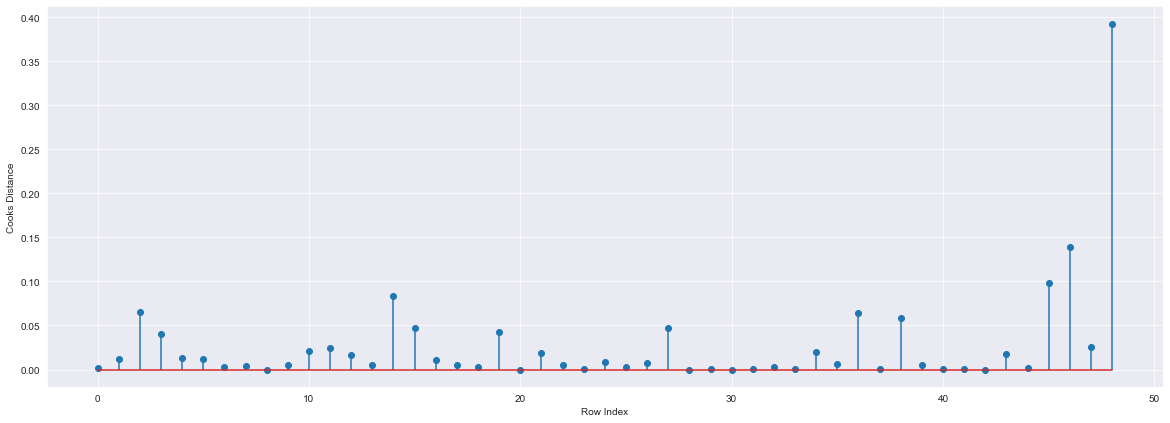

In [84]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dff_new1)),np.round(c_V,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [85]:
#index and value of influencer where value of c is more than 0.5
(np.argmax(c_V),np.max(c_V))

(48, 0.39274420556321554)

In [87]:
dff_new1[dff_new1.index.isin([48])]

,RD,ADS,MKS,State,Profit
48,542.05,51743.15,0.0,New York,35673.41


In [88]:
# again dropping the row
dff_new2=dff_new1.drop(dff_new1.index[[48]],axis=0)

In [89]:
dff_new2

,RD,ADS,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Again creating the final_model

In [97]:
final_model=smf.ols('Profit~RD+ADS+MKS',data=dff_new2).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           2.03e-31
Time:                        13:46:23   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD             0.7895      0.036     21.718      0.000       0.716       0.863
ADS           -0.0633      0.044     -1.442      0.156      -0.152       0.025
MKS            0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# Check the accuracy of the model
(final_model.rsquared,final_model.aic)

(0.9626766170294073, 994.6690439260116)

In [ ]:
# Since the value is <1, so we can stop the diagonistic process and finalize the model

# Model Predictions

In [93]:
# say New data for prediction is
new_data=pd.DataFrame({'RD':65000,"ADS":80000,"MKS":130000},index=[0])
new_data

,RD,ADS,MKS
0,65000,80000,130000


In [99]:
# Manual Prediction of Price
final_model.predict(new_data)

0    107544.093573
dtype: float64

In [100]:
# Automatic Prediction of Price with 90% accurcy
pred_y=final_model.predict(dff_new2)
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

## Table containing R^2 value for each prepared model


In [105]:
data={'No. of Models':['model1','model2','final_model'],'R-squared_value':[model.rsquared,model2.rsquared,final_model.rsquared]}

In [106]:
New_data=pd.DataFrame(data)

In [107]:
New_data

,No. of Models,R-squared_value
0,model1,0.950746
1,model2,0.961316
2,final_model,0.962677
